<a href="https://colab.research.google.com/github/mehdii190/neural-network/blob/main/src/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***importing***

In [185]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as db

In [186]:
mean_gray = 0.1307
stddev_gray = 0.3081

# input [channel] = (input[channel] -mean[channel])  /std[channel] 

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((mean_gray,),(stddev_gray))])


In [187]:
#train_dataset = db.MNIST(root = "data", train = True , transform = transforms, download = True)

#test_dataset = db.MNIST(root = "data",train = False,transform = transforms, download = True)

In [188]:
batch_size = 100

#train_load = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
#test_load = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)


train_loader = torch.utils.data.DataLoader(
    db.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [189]:
test_loader = torch.utils.data.DataLoader(
    db.MNIST('data', train=False, transform=transform),
    batch_size=1000)

In [190]:
len(test_loader)

10

In [191]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.cnn1 = nn.Conv2d(in_channels= 1 , out_channels= 8 , kernel_size=3,stride=1,padding = 1)
    self.batchnorm1 = nn.BatchNorm2d(8)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2)
    self.cnn2 = nn.Conv2d(in_channels= 8 , out_channels= 32 , kernel_size=5,stride=1,padding = 2)
    self.batchnorm2 = nn.BatchNorm2d(32)
    self.fc1 = nn.Linear(1568,600)
    self.dropout = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(600,10)

  def forward(self,x):
    out = self.cnn1(x)
    out = self.batchnorm1(out)
    out = self.relu(out)
    out = self.maxpool(out)
    out = self.cnn2(out)
    out = self.batchnorm2(out)
    out = self.relu(out)
    out = self.maxpool(out)

    #  flatten the 32 feature maps from max pool to feed it to the fc1 
    out = out.view(-1,1568)
    #then we forward through our fully conn layer
    out = self.fc1(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)

    return out

In [192]:
torch.cuda.is_available()

True

In [193]:
model = CNN()

CUDA = torch.cuda.is_available()

if CUDA:
  model = model.cuda()



loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [194]:
iteration = 0
correct = 0



for i,(input,labels) in enumerate(train_loader):

  if CUDA:
    input = input.cuda()
    labels = labels.cuda()


  print("input shape : ",input.shape)
  print("labels shape : ",labels.shape)

  output = model(input)
  print("output shape : ",output.shape )

  _ , pred = torch.max(output,1)
  print("pred shape : ",pred.shape)
  print("predicten: ")
  print(pred)
  correct += (pred==labels).sum()
  break

input shape :  torch.Size([100, 1, 28, 28])
labels shape :  torch.Size([100])
output shape :  torch.Size([100, 10])
pred shape :  torch.Size([100])
predicten: 
tensor([3, 3, 5, 3, 3, 3, 3, 3, 8, 3, 3, 3, 2, 3, 2, 3, 5, 3, 2, 3, 3, 3, 3, 5,
        1, 2, 3, 3, 3, 3, 7, 3, 3, 3, 3, 2, 8, 3, 3, 2, 1, 3, 8, 3, 3, 3, 5, 2,
        9, 3, 3, 8, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 2, 8,
        3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 1, 3, 2,
        3, 5, 3, 3], device='cuda:0')


In [195]:
num_epochs = 10
train_loss = []
train_acc = []
test_loss = []
test_acc = []


for epoch in range(num_epochs):

  correct = 0.0
  iteration = 0.0
  iter_loss = 0.0

  model.train()

  for i ,(inputs,labels) in enumerate(train_loader):

    if CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()

    output = model(inputs)
    loss = loss_fn(output,labels)
    iter_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _ , pred = torch.max(output,1)
    correct += (pred==labels).sum().item()
    iteration += 1
  
  train_loss.append(iter_loss / iteration)
  train_acc.append(100*correct / len(train_loader.dataset))

  ############## TEST ##############

  test_losss = 0.0
  correct = 0.0
  iteration = 0.0
  
  model.eval()

  for i ,(inputs,labels) in enumerate(test_loader):

    if CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()

    output = model(inputs)
    loss = loss_fn(output,labels)
    test_losss += loss.item()

    _ , pred = torch.max(output,1)
    correct += (pred==labels).sum().item()
    iteration += 1

  test_loss.append(test_losss / iteration)
  test_acc.append(100*correct / len(test_loader.dataset))


  print("Epoch {}/{} , Training Loss : {:.3f} , Training accuracy : {:.3f} , Testing Loss : {:.3f} ,Testing accuracy : {:.3f}".format(
      epoch+1,num_epochs,train_loss[-1],train_acc[-1],test_loss[-1],test_acc[-1]))




Epoch 1/10 , Training Loss : 0.976 , Training accuracy : 68.852 , Testing Loss : 0.089 ,Testing accuracy : 97.340
Epoch 2/10 , Training Loss : 0.305 , Training accuracy : 89.763 , Testing Loss : 0.060 ,Testing accuracy : 98.140
Epoch 3/10 , Training Loss : 0.151 , Training accuracy : 95.410 , Testing Loss : 0.041 ,Testing accuracy : 98.690
Epoch 4/10 , Training Loss : 0.105 , Training accuracy : 96.827 , Testing Loss : 0.036 ,Testing accuracy : 98.940
Epoch 5/10 , Training Loss : 0.089 , Training accuracy : 97.377 , Testing Loss : 0.039 ,Testing accuracy : 98.900
Epoch 6/10 , Training Loss : 0.079 , Training accuracy : 97.685 , Testing Loss : 0.037 ,Testing accuracy : 98.990
Epoch 7/10 , Training Loss : 0.071 , Training accuracy : 97.930 , Testing Loss : 0.044 ,Testing accuracy : 98.820
Epoch 8/10 , Training Loss : 0.068 , Training accuracy : 97.998 , Testing Loss : 0.040 ,Testing accuracy : 98.860
Epoch 9/10 , Training Loss : 0.064 , Training accuracy : 98.110 , Testing Loss : 0.039 ,

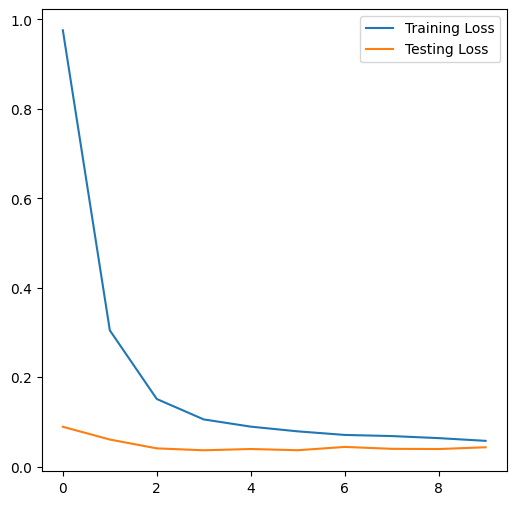

In [196]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(6,6))

plt.plot(train_loss,label = "Training Loss")
plt.plot(test_loss,label = "Testing Loss")
plt.legend()
plt.show()

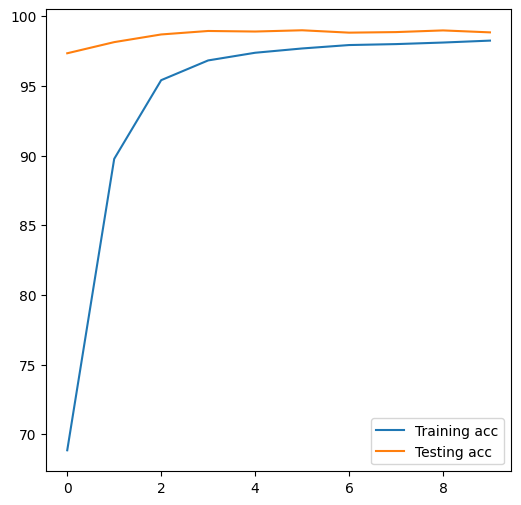

In [197]:
f = plt.figure(figsize=(6,6))

plt.plot(np.arange(len(train_loss)), train_acc,label = "Training acc")
plt.plot(np.arange(len(test_loss)), test_acc,label = "Testing acc")
plt.legend()
plt.show()

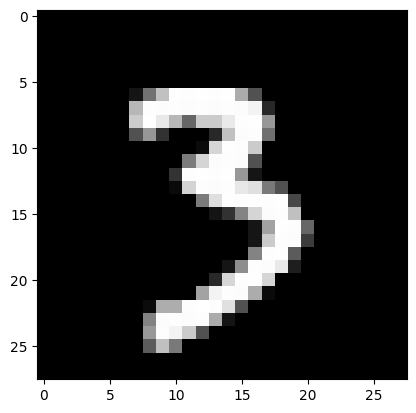

In [198]:
img = test_loader.dataset[30][0].numpy() * stddev_gray + mean_gray #.resize_((1,1,28,28))

plt.imshow(img.reshape(28,28),cmap="gray")

In [199]:
imgg = test_loader.dataset[30][0].resize_((1,1,28,28))
label = test_loader.dataset[30][1]

model.eval()

if CUDA:
  model = model.cuda
  imgg = imgg.cuda

outputs = model(imgg)

_ , pred = torch.max(outputs,1)

print("predicten is : {} ".format(pred.item()))
print("actual is : {} ".format(label))

TypeError: ignored